<a href="https://colab.research.google.com/github/dennkitotaichi/CE_PLUS/blob/patch-1/LSTM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving testTotal2019.csv to testTotal2019.csv


     Unnamed: 0  ...  Average cloud volume (10 pct)
0      2016/9/1  ...                            4.3
1      2016/9/2  ...                            9.5
2      2016/9/3  ...                           10.0
3      2016/9/4  ...                           10.0
4      2016/9/5  ...                            8.3
...         ...  ...                            ...
1090  2019/8/27  ...                            3.8
1091  2019/8/28  ...                           10.0
1092  2019/8/29  ...                           10.0
1093  2019/8/30  ...                            7.8
1094  2019/8/31  ...                            6.3

[1095 rows x 24 columns]
     Unnamed: 0  ...  Average cloud volume (10 pct)
0      2016/9/1  ...                            4.3
1      2016/9/2  ...                            9.5
2      2016/9/3  ...                           10.0
3      2016/9/4  ...                           10.0
4      2016/9/5  ...                            8.3
...         ...  ...                  

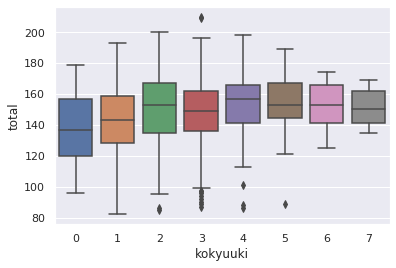

In [0]:
import pandas as pd

dt = pd.read_csv('testTotal2019.csv')
print(dt)
df = pd.DataFrame(dt)
print(df)
print(df.columns)
print(df.columns[[0]])
print(df.drop(df.columns[[0]], axis=1))
dtt=df.drop(df.columns[[0]], axis=1)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set()
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(x="kokyuuki", y="total", data=dtt)

import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import r2_score

import random

from pandas.plotting import scatter_matrix

                             Name  Coefficients
5                        kaitouOP     -0.487603
9                     fukukuukyou     -0.154450
1                             man     -0.153783
2                           woman     -0.108276
15         Daylight Hours (Hours)     -0.107434
21  Average cloud volume (10 pct)     -0.070116
17            Total snowfall (cm)     -0.020358
8                        honenoOP     -0.012234
19  Minimum relative humidity (%)     -0.010244
14       Total precipitation (mm)     -0.010065
11        Average temperature (C)     -0.008416
13          Maximum temperature ?     -0.006994
7                       kaifukuOP     -0.006229
16              Deepest Snow (cm)      0.003939
20   Average local pressure (hPa)      0.026930
12           Lowest temperature ?      0.044669
4                      sinndennzu      0.069103
10                         elseOP      0.085186
0                           total      0.169722
18          Total snowfall (cm).1      0

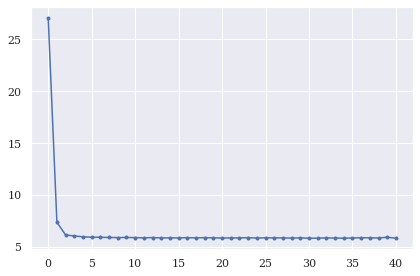

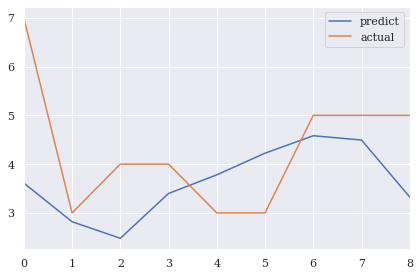

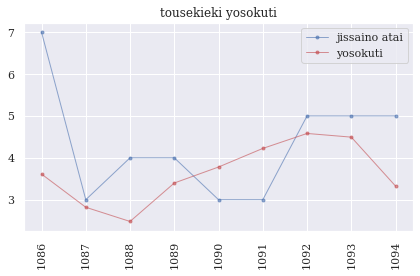

平均絶対誤差 (MAE, Mean Absolute Error
1.1439166863759358
二乗平均平方根誤差（RMSE） : 1.473
9/9 [==============================] - 0s 46ms/step
Epoch 1/1
1086/1086 [==============================] - 0s 293us/step - loss: 5.8152
test_r2_score
-0.41002793675038385


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import r2_score

import random
from sklearn import linear_model
clf = linear_model.LinearRegression()
# 説明変数に "sirinnji(sirinnjiスコア以外すべて)" を利用
wine_except_quality = dtt.drop('sirinnji', axis=1)
X = wine_except_quality.values
 
# 目的変数に "sirinnji" を利用
Y = dtt['sirinnji'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)


print("------------------------------------------------------------")

 
# データフレームの各列を正規化
wine2 = dtt.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()
 

# 説明変数に "quality (kokyuukiスコア以外すべて)" を利用
wine2_except_quality = wine2.drop('sirinnji', axis=1)
X = wine2_except_quality.values
 
# 目的変数に "quality (品質スコア)" を利用
Y = df['sirinnji'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine2_except_quality.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)


print("------------------------------------------------------------")

#説明変数入力用
p1 = df['kaikyouOP'].values
p2 = df['kokyuuki'].values
p3 = df['Total snowfall (cm).1'].values
p4 = df['total'].values
p5 = df['elseOP'].values

#正規化後説明変数入力用
s1 = wine2['total'].values
s2 = wine2['man'].values
s3 = wine2['woman'].values
s4 = wine2['sinndennzu'].values
s5 = wine2['kokyuuki'].values

sika=np.array([[s1,s2,p1]])
si=sika.T
X=si

print(X)
print("X.shape")
print(X.shape)


maxlen = 10
Y = []
for i in range(len(df)):
 
    #df[[]]de2jigennhairetu  iloc は 行、列を番号で指定します（先頭が 0）iloc[i:(i+maxlen)]カッコ内の数値はスライス形式で[行の開始位置:行の終了位置-1].valuesまとめて「値」のみをリストで取り出し
    Y.append(df[['sirinnji']].iloc[i].values)
    #Y.append

#Y=np.array(Y)

Y=np.array(Y)


print("X.shape[0]")
print(X.shape[0])
print("X.shape[1]")
print(X.shape[1])
print("X.shape[2]")
print(X.shape[2])

print("Y")
print(Y)

print("Y.shape")
print(Y.shape)


print("X[1][0][0]")
print(X[1][0][0])
print("X[0][1][0]")
print(X[0][1][0])
print("X[0][0][0]")
print(X[0][0][0])


# 訓練用のデータと、テスト用のデータに分ける
N_train = int(len(df) * 0.992)
N_test = len(df) - N_train
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=N_test, shuffle = False) 


# 隠れ層の数などを定義: 隠れ層の数が大きいほど精度が上がる?
n_in = 1 # len(X[0][0])
n_out = 1 # len(Y[0])
n_hidden = 50

#モデル作成 (Kerasのフレームワークで簡易に記載できる)
#LSTM の入力は、三次元になっていて、訓練データの数×1つの訓練データの入力の長さ×変数の数となっています。


model = Sequential()
model.add(LSTM(n_hidden,
               batch_input_shape=(None, X_train.shape[1], n_in),
               kernel_initializer='random_uniform',
               return_sequences=False))
model.add(Dense(n_in, kernel_initializer='random_uniform'))
model.add(Dense(n_in, kernel_initializer='random_uniform'))
model.add(Activation("linear"))

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss = "mean_squared_error", optimizer=opt)

early_stopping = EarlyStopping(monitor='loss', patience=10, verbose=1)
hist = model.fit(X_train, y_train, batch_size=5, epochs=10000,
                 callbacks=[early_stopping])


#オプティマイザ（最適化アルゴリズム）はモデルをコンパイルする際に必要となるパラメータの1つです:

#results = model.evaluate(X_test, y_test)
#print(results)

# 損失のグラフ化
loss = hist.history['loss']
epochs = len(loss)
plt.rc('font', family='serif')
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(range(epochs), loss, marker='.', label='loss(training data)');
plt.tight_layout()
plt.show()




# 予測結果
predicted = model.predict(X_test)
result = pd.DataFrame(predicted)
result.columns = ['predict']
result['actual'] = y_test
result.plot();
plt.tight_layout()
plt.show()



## 予測値
df_predict =  pd.DataFrame(model.predict(X_test), columns=['yosokuti'])
#seisuuhyoujinobaai ikanonyuuryoku 
#df_predicts = np.round(df_predict)
#print(df_predicts)


## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title("tousekieki yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="jissaino atai", linewidth=1)
plt.plot(pre_date, df_predict['yosokuti'].values, 'r', alpha=0.6, marker='.', label="yosokuti", linewidth=1)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True);
plt.tight_layout()
plt.show()


from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(df_predict['yosokuti'].values,y_test))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test, df_predict["yosokuti"].values)))
results = model.evaluate(X_test,y_test)

model.fit (X_train,y_train)
y_pred = model.predict(X_test)


test_r2_score = r2_score(y_test,y_pred)
print("test_r2_score")
print(test_r2_score)




In [0]:

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(df_predict['yosokuti'].values,y_test))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test, df_predict["yosokuti"].values)))
results = model.evaluate(X_test,y_test)


model.fit (X_train,y_train)
y_pred = model.predict(X_test)


test_r2_score = r2_score(y_test,y_pred)
print("test_r2_score")
print(test_r2_score)

平均絶対誤差 (MAE, Mean Absolute Error
1.9678713469744817
二乗平均平方根誤差（RMSE） : 2.391
219/219 [==============================] - 0s 1ms/step
Epoch 1/1
876/876 [==============================] - 0s 328us/step - loss: 6.0486
test_r2_score
-0.062145245880431466


In [0]:
# 必要なライブラリの import
from sklearn.linear_model import LogisticRegression

X_trainval, X_test, y_trainval, y_test = train_test_split(X,Y,test_size=0.2, shuffle = False)
X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval,test_size=0.2, shuffle = False)

print("------------------------------------------------------------")



# training set を用いて学習
logreg = LogisticRegression().fit(X_train, y_train)

# test set を用いて評価
score = logreg.score(X_val, y_val)
print('Test set score: {}'.format(score))

from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()

# 交差検証
scores = cross_val_score(logreg, X_trainval, y_trainval, cv=5)

# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))

# スコアの平均値
import numpy as np
print('Average score: {}'.format(np.mean(scores)))
print("------------------------------------------------------------")


------------------------------------------------------------


ValueError: ignored

In [1]:
gs_result = pd.DataFrame.from_dict(gscv.cv_results_)
print('gs_result')
print(gs_result)

print(gs_result.mean())

gs_result.to_csv('gs_result2.csv')
  # 最高性能のモデルを取得し、テストデータを分類
best = gscv.best_estimator_
pred = best.predict(X_test)

  # 混同行列を出力
print(pred)

# テスト結果を評価する,accuracy_score()
print("予測対象：", y_test, ", 予測結果→", pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(y_test, pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test,pred)))

## test_r2_score計算
test_r2_score = r2_score(y_test,pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()


NameError: ignored